## Business Understanding

The dataset contains monthly gold prices from 1950-01 to 2020-07. It includes a total of 847 data points, with each row representing the gold price 
for a particular month.

## Problem Statement

Predict historical monthly gold prices from 1950 to 2020 and develop a predictive model for forecasting future gold prices.

## Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [6]:
GoldMonthlyData=pd.read_csv('C:/Users/HP/OneDrive/Desktop/Python Project folder/Python Time Series Forecasting Projects/GoldMonthlyData.csv')
GoldMonthlyData.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


## Basic Data Exploration

In [7]:
GoldMonthlyData.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [8]:
# Observing the summarized information of the data
GoldMonthlyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [9]:
# looking at the descriptive statistics of the data
GoldMonthlyData.describe(include='all')

,Date,Price
count,847,847.000000
unique,847,NaN
top,1950-01,NaN
freq,1,NaN
mean,NaN,416.556906
std,NaN,453.665313
min,NaN,34.490000
25%,NaN,35.190000
50%,NaN,319.622000
75%,NaN,447.029000


In [10]:
# Finding unique values for each column
GoldMonthlyData.nunique()

Date     847
Price    681
dtype: int64

In [11]:
# Check the shape of the data
GoldMonthlyData.shape

(847, 2)

## Feature Enginnering in Data

In [12]:
GoldMonthlyData['Date'] = pd.to_datetime(GoldMonthlyData['Date'])

In [13]:
# Function to get month from a date
def Function_get_month(inpDate):
    return(inpDate.month)
# Function to get Year from a date
def Function_get_year(inpDate):
    return(inpDate.year)
# Creating new columns
GoldMonthlyData['Month']=GoldMonthlyData['Date'].apply(Function_get_month)
GoldMonthlyData['Year']=GoldMonthlyData['Date'].apply(Function_get_year)
GoldMonthlyData.head()

,Date,Price,Month,Year
0,1950-01-01,34.73,1,1950
1,1950-02-01,34.73,2,1950
2,1950-03-01,34.73,3,1950
3,1950-04-01,34.73,4,1950
4,1950-05-01,34.73,5,1950


In [14]:
# Checking unique values in Year and Month Columns
print("Unique Values in Year Column: ", GoldMonthlyData['Year'].sort_values().unique())
print("Unique Values in Month Column: ", GoldMonthlyData['Month'].sort_values().unique())

Unique Values in Year Column:  [1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020]
Unique Values in Month Column:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


## Monthly Gold Price 

In [15]:
# Aggregating the gold price for each month for all categories
pd.crosstab(columns=GoldMonthlyData['Month'],
            index=GoldMonthlyData['Year'],
            values=GoldMonthlyData['Price'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1950,34.730,34.730,34.730,34.730,34.730,34.730,34.730,34.730,34.730,34.730,34.730,34.720
1951,34.720,34.730,34.730,34.730,34.730,34.730,34.720,34.710,34.710,34.710,34.730,34.660
1952,34.490,34.490,34.680,34.820,34.730,34.530,34.570,34.580,34.510,34.630,34.720,34.790
1953,34.880,34.950,34.920,34.930,34.900,34.890,34.910,34.910,34.760,34.790,34.860,34.850
1954,34.860,34.880,34.920,35.040,35.080,35.070,35.080,35.050,35.080,35.080,35.060,35.040
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,1095.655,1194.893,1246.312,1241.452,1259.755,1273.580,1337.429,1340.861,1326.618,1268.929,1240.293,1152.165
2017,1192.648,1233.390,1231.063,1267.150,1245.250,1261.277,1235.100,1281.720,1317.045,1280.677,1283.189,1265.674
2018,1332.809,1333.775,1325.562,1335.332,1303.618,1282.126,1238.064,1201.859,1199.198,1214.726,1221.275,1249.887


In [16]:
GoldMonthlyData.head()

,Date,Price,Month,Year
0,1950-01-01,34.73,1,1950
1,1950-02-01,34.73,2,1950
2,1950-03-01,34.73,3,1950
3,1950-04-01,34.73,4,1950
4,1950-05-01,34.73,5,1950


In [17]:
GoldMonthlyData.fillna(method='ffill', inplace=True)

In [18]:
GoldPrice=pd.crosstab(columns=GoldMonthlyData['Year'],
            index=GoldMonthlyData['Month'],
            values=GoldMonthlyData['Price'],
            aggfunc='sum').melt()

In [19]:
GoldMonthlyData.tail()

,Date,Price,Month,Year
842,2020-03-01,1593.764,3,2020
843,2020-04-01,1680.030,4,2020
844,2020-05-01,1715.697,5,2020
845,2020-06-01,1734.032,6,2020
846,2020-07-01,1840.807,7,2020


In [20]:
GoldPrice=pd.crosstab(columns=GoldMonthlyData['Year'],
            index=GoldMonthlyData['Month'],
            values=GoldMonthlyData['Price'],
            aggfunc='sum').melt()

In [21]:
GoldPrice.isna().sum()

Year     0
value    5
dtype: int64

In [22]:
GoldPrice.ffill(axis=0,inplace=True)

## Visualizing Gold Price Trends Over Years

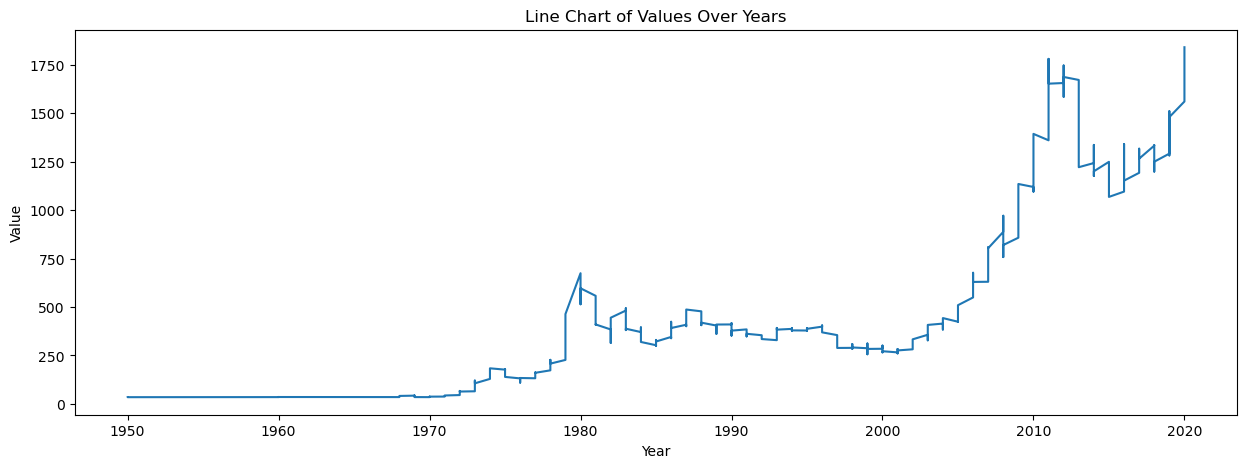

In [23]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(GoldPrice['Year'], GoldPrice['value'])

# Adding titles and labels
plt.title('Line Chart of Values Over Years')
plt.xlabel('Year')
plt.ylabel('Value')

# Display the plot
plt.show()

## Visualizing Gold Price Trends Over Time

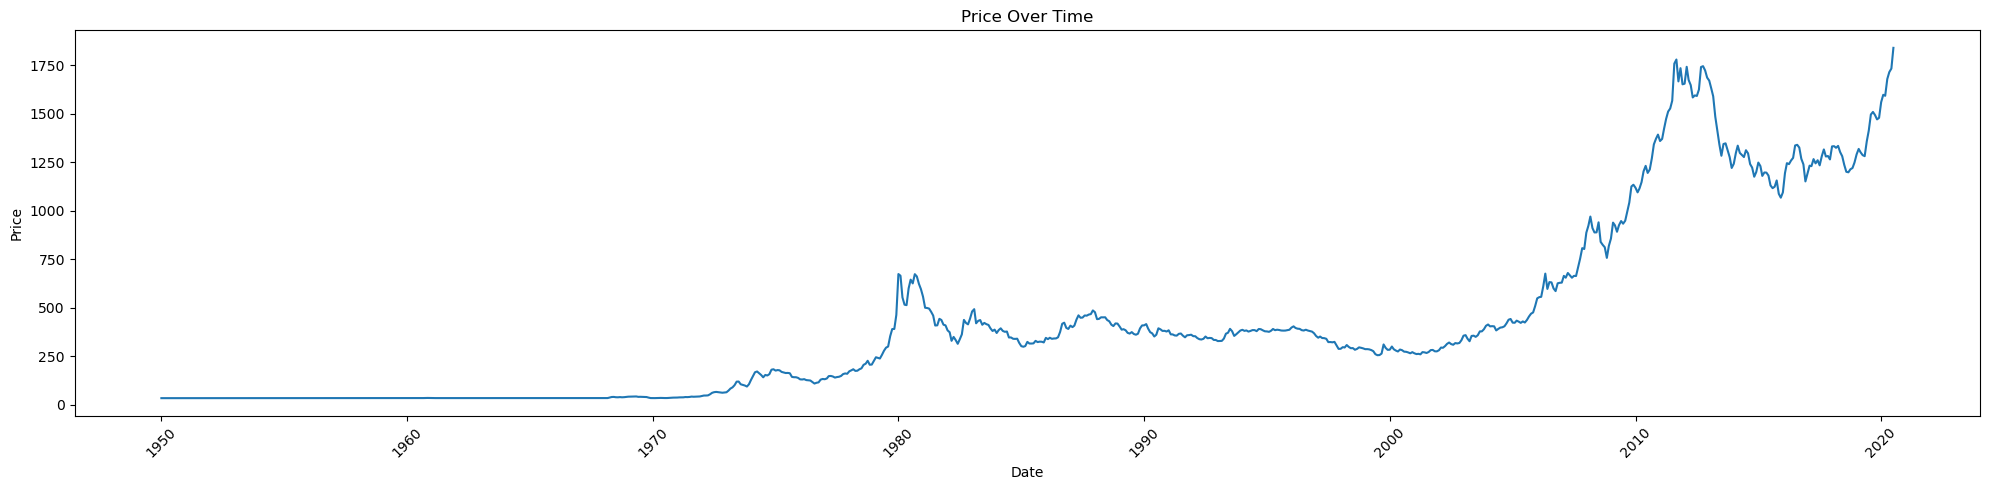

In [24]:
GoldMonthlyData['new_date'] = pd.to_datetime(GoldMonthlyData[['Year','Month']].assign(day=1))

plt.figure(figsize=(20, 5))
plt.plot(GoldMonthlyData['new_date'], GoldMonthlyData['Price'])
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
GoldMonthlyData.head()

,Date,Price,Month,Year,new_date
0,1950-01-01,34.73,1,1950,1950-01-01
1,1950-02-01,34.73,2,1950,1950-02-01
2,1950-03-01,34.73,3,1950,1950-03-01
3,1950-04-01,34.73,4,1950,1950-04-01
4,1950-05-01,34.73,5,1950,1950-05-01


In [26]:
GoldPrice=GoldMonthlyData.set_index('Date')
GoldPrice=GoldPrice['Price']

In [27]:
GoldPrice

Date
1950-01-01      34.730
1950-02-01      34.730
1950-03-01      34.730
1950-04-01      34.730
1950-05-01      34.730
                ...   
2020-03-01    1593.764
2020-04-01    1680.030
2020-05-01    1715.697
2020-06-01    1734.032
2020-07-01    1840.807
Name: Price, Length: 847, dtype: float64

# Seasonal Decomposition

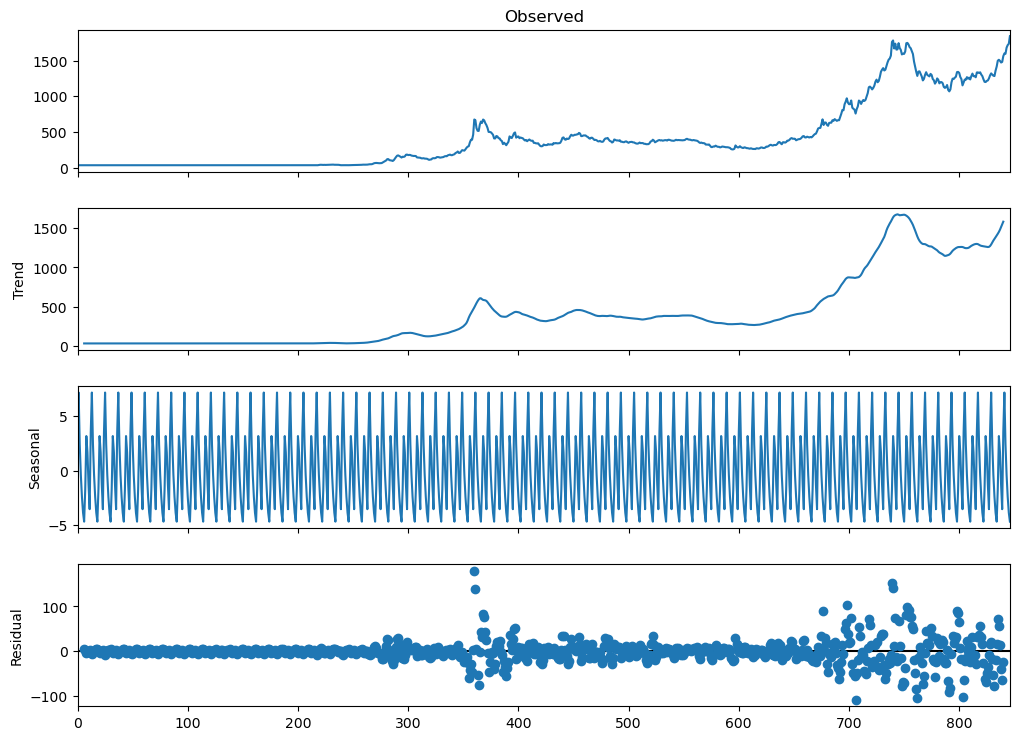

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = GoldPrice.values
result = seasonal_decompose(series, period=12)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.show()

## Finding best hyperparameters for SARIMA model

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

def FunctionTuneArima(inpData, p_values, d_values, q_values, 
                      seasonal_p_values, seasonal_d_values, seasonal_q_values, cycle):
    # Suppressing warning messages
    warnings.filterwarnings(action='ignore')
    
    # Creating an empty DataFrame to store results
    Results = pd.DataFrame()

    # Trying the values
    for p_value in p_values:
        for d_value in d_values:
            for q_value in q_values:
                for seasonal_p_value in seasonal_p_values:
                    for seasonal_d_value in seasonal_d_values:
                        for seasonal_q_value in seasonal_q_values:
                            try:
                                # Fitting SARIMA model
                                model = SARIMAX(inpData, 
                                                order=(p_value, d_value, q_value), 
                                                seasonal_order=(seasonal_p_value, 
                                                                seasonal_d_value,
                                                                seasonal_q_value,
                                                                cycle))
                                model_fit = model.fit(disp=False)
                                
                                # Predictions and accuracy calculation
                                pred = model_fit.predict(0, len(inpData) - 1)
                                Acc = 100 - np.mean(np.abs(pred - inpData) / np.where(inpData != 0, inpData, np.nan)) * 100
                                
                                # Appending the results
                                Results = pd.concat([Results, pd.DataFrame([[p_value,
                                                                             d_value,
                                                                             q_value,
                                                                             seasonal_p_value,
                                                                             seasonal_d_value,
                                                                             seasonal_q_value,
                                                                             Acc]],
                                                                           columns=["p", "d", "q",
                                                                                    "seasonal_p", "seasonal_d", 
                                                                                    "seasonal_q", "Accuracy"])])
                            except Exception as e:
                                print(f"Error for parameters (p,d,q)={(p_value,d_value,q_value)} and (P,D,Q)={(seasonal_p_value, seasonal_d_value, seasonal_q_value)}: {e}")
                                pass
    return Results

In [30]:
GoldPrice

Date
1950-01-01      34.730
1950-02-01      34.730
1950-03-01      34.730
1950-04-01      34.730
1950-05-01      34.730
                ...   
2020-03-01    1593.764
2020-04-01    1680.030
2020-05-01    1715.697
2020-06-01    1734.032
2020-07-01    1840.807
Name: Price, Length: 847, dtype: float64

In [31]:
# Calling the function to get the best values
# This can take some time because there are multiple combinations!
# Cycle=12 because this is monthly data
ResultsData=FunctionTuneArima(inpData=GoldPrice,
                  p_values=[0,1], 
                  d_values=[0,1], 
                  q_values=[1,10],  
                  seasonal_p_values=[1,2],                                       
                  seasonal_d_values=[0], 
                  seasonal_q_values=[0],
                  cycle=12       
                 )

Error for parameters (p,d,q)=(0, 0, 1) and (P,D,Q)=(2, 0, 0): LU decomposition error.


In [32]:
# Sorting the results to get best values
ResultsData.sort_values('Accuracy', ascending=False).head(10)

,p,d,q,seasonal_p,seasonal_d,seasonal_q,Accuracy
0,0,1,1,1,0,0,97.537555
0,1,0,1,1,0,0,97.535032
0,1,1,1,1,0,0,97.528165
0,0,1,1,2,0,0,97.524210
0,1,0,1,2,0,0,97.521479
0,1,1,10,1,0,0,97.518454
0,1,1,1,2,0,0,97.517992
0,0,1,10,1,0,0,97.515397
0,1,0,10,1,0,0,97.512562
0,1,1,10,2,0,0,97.508119


## Creating a Predictive Model for Monthly Forecasts of Future Gold Prices

Next 12 Month Forecast:
 2020-08-01    1858.262950
2020-09-01    1849.561763
2020-10-01    1854.757073
2020-11-01    1851.333594
2020-12-01    1854.474610
2021-01-01    1858.236365
2021-02-01    1861.402772
2021-03-01    1860.216106
2021-04-01    1863.039103
2021-05-01    1864.214956
2021-06-01    1868.297858
2021-07-01    1874.927049
Freq: MS, Name: Forecast, dtype: float64


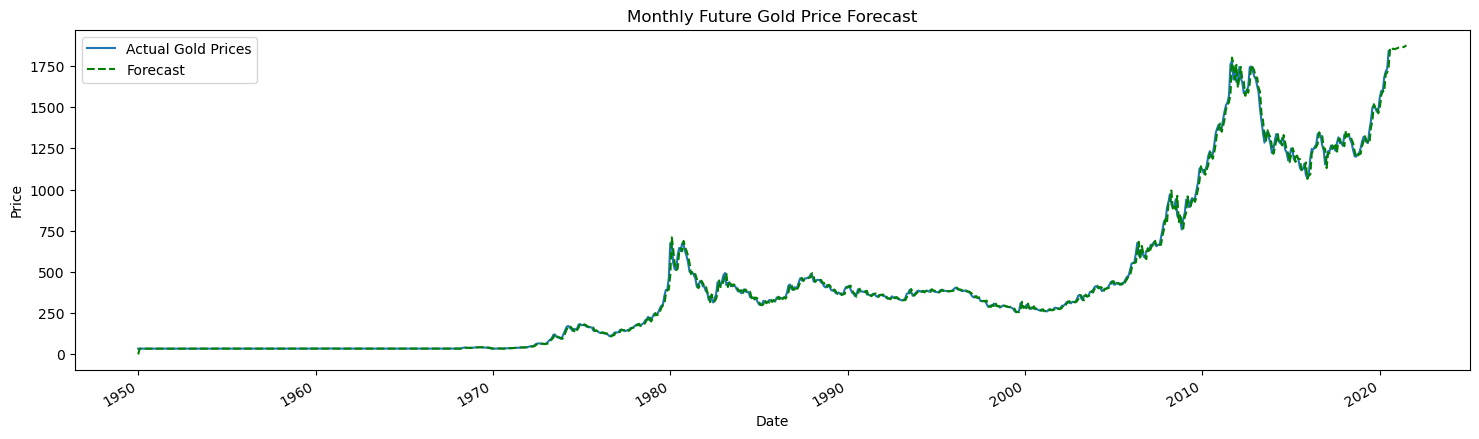

#### Accuracy of model: 97.52 ####


In [39]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Train the SARIMA model on the full dataset
SarimaxModel = SARIMAX(GoldPrice,  
                       order=(1, 1, 1),  # Adjusted order values based on typical SARIMA structure
                       seasonal_order=(2, 0, 1, 12))  # Monthly seasonality (S=12)

# Fitting the model to the data
GoldModel = SarimaxModel.fit(disp=False)

# Forecast for the next 6 to 12 months
FutureMonths = 12  # Change this to 6 if a shorter forecast is desired
forecast = GoldModel.predict(start=0,
                             end=(len(GoldPrice)) + FutureMonths - 1,
                             typ='levels').rename('Forecast')

# Displaying the forecasted values for the next 6-12 months
print(f"Next {FutureMonths} Month Forecast:\n", forecast[-FutureMonths:])

# Plotting the original data and forecasted values
plt.figure(figsize=(18, 5))
plt.plot(GoldPrice, label='Actual Gold Prices')
forecast.plot(label='Forecast', color='green', linestyle='--')
plt.title('Monthly Future Gold Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Measuring the accuracy of the model on the training set
MAPE = np.mean(abs(GoldPrice - forecast[:len(GoldPrice)]) / GoldPrice) * 100
print('#### Accuracy of model:', round(100 - MAPE, 2), '####')

# Optional: Display month names in X-Axis
# Generate month names assuming GoldPrice.index is a datetime index
MonthNames = GoldPrice.index.strftime('%b %Y')
FutureMonthNames = pd.date_range(start=GoldPrice.index[-1] + pd.DateOffset(months=1),
                                 periods=FutureMonths, freq='M').strftime('%b %Y')
PlotMonthNames = MonthNames.tolist() + FutureMonthNames.tolist()